installing requirements:

pip install -r requirements.txt

In [498]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from typing import Tuple



In [499]:

def print_df_info(df: pd.DataFrame) -> None:
    """
    Print information about the DataFrame. 
    1- Number of rows and columns
    2- First 2 rows of the DataFrame
    3- Last 2 rows of the DataFrame
    4- 5 random rows of the DataFrame

    :params:
        df (pandas.DataFrame): The DataFrame to be analyzed.
    """

    # Number of rows and columns
    rows, columns = df.shape
    print("Number of rows:", rows)
    print("Number of columns:", columns)

    # Print the first 2 rows of the DataFrame
    print("First 2 rows of the DataFrame:")
    print(df.head(2))

    # Print the last 2 rows of the DataFrame
    print("Last 2 rows of the DataFrame:")
    print(df.tail(2))

    # Print 5 random rows of the DataFrame
    print("5 random rows of the DataFrame:")
    print(df.sample(5))

In [500]:
print("*** Working with FILE1.xlsx ***")
#Read the xlsx file to a dataframe
xlsx_df = pd.read_excel('FILE1.xlsx', sheet_name='Sheet1')
print_df_info(xlsx_df)


print("\n\n*** Working with FILE2.csv ***")
# Read the csv file to a dataframe
csv_df = pd.read_csv('FILE2.csv')
print_df_info(csv_df)


*** Working with FILE1.xlsx ***
Number of rows: 13
Number of columns: 4
First 2 rows of the DataFrame:
   ID  NUM_CHILDREN  SALARY_PER_MONTH  CAR_VALUE
0   1             4            4343.0    23232.0
1   2             3            6464.0    35353.0
Last 2 rows of the DataFrame:
    ID  NUM_CHILDREN  SALARY_PER_MONTH  CAR_VALUE
11  12             1           34543.0    64564.0
12  13             3           53436.0     5343.0
5 random rows of the DataFrame:
    ID  NUM_CHILDREN  SALARY_PER_MONTH  CAR_VALUE
11  12             1           34543.0    64564.0
9   10             6               NaN   543523.0
4    5             5            4564.0        NaN
1    2             3            6464.0    35353.0
5    6             2            5355.0    53453.0


*** Working with FILE2.csv ***
Number of rows: 13
Number of columns: 2
First 2 rows of the DataFrame:
   ID  Years_of_education
0   1                10.0
1   2                 NaN
Last 2 rows of the DataFrame:
    ID  Years_of_education

In [501]:
# Merge both dataframes
merged_df = pd.merge(xlsx_df, csv_df, on='ID')
# Set the 'ID' column as the index
merged_df.set_index('ID', inplace=True)


# Two ways to treat missing values in a dataframe 
# https://pca4ds.github.io/handling-missing-values.html
# we choose the second one

# 1- Remove rows with NaN values
dropped_na_df = merged_df.dropna(inplace=False)

# 2- Replace NaN values with column averages
column_averages = merged_df.mean()  # Calculate the column averages
averaged_df =  merged_df.fillna(column_averages, inplace=False)




In [502]:
# Extract the features for PCA
features = averaged_df.columns.to_list()
X = averaged_df[features]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


**
Standardize the data an optional but recommended step when performing PCA. The purpose of standardization is to ensure that all the features (columns) have similar scales or units. Standardization transforms the data in such a way that each feature has a mean of 0 and a standard deviation of 1.

In [503]:
def perform_pca(X_standardized:np.ndarray, n_components:int)->Tuple[np.ndarray, PCA]:
    """
    Perform PCA on the given data X_standardized and return the transformed data
    :param X_standardized(np.ndarray): The data to be transformed
    :param n_components(int): The number of components to project the data onto
    :return X_pca (np.ndarray): The transformed data
    :return pca (PCA): The PCA model

    """
    # Create and fit the PCA model
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_standardized)
    return X_pca, pca

In [504]:

def calculate_number_of_components(pca:PCA, threshold:float = 0.85)->int:
    """
    
    Calculate the number of components that explain (threshold) of the variance in the dataset based on calculating 
    the explained variance percentage of individual components and the cumulative explained variance percentage
    :param pca: PCA object
    :param threshold: (float) : threshold value for the cumulative explained variance percentage, default value is 0.85
    :return: number of components (int) : number of components that explain threshold of the variance in the dataset
    """

    # Get the explained variance percentage for each component
    explained_var_ratio = pca.explained_variance_ratio_
    # Calculate the cumulative explained variance percentage
    cumulative_var_ratio = np.cumsum(explained_var_ratio)

    print("Explained Variance Ratio: ", explained_var_ratio)
    print("Cumulative Explained Variance Ratio: ", cumulative_var_ratio)
    # Plot the explained variance percentage of individual components
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_components + 1), explained_var_ratio, alpha=0.7)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Percentage")
    plt.title("Explained Variance Percentage of Individual Components")
    plt.xticks(range(1, n_components + 1))
    plt.show()

    # Plot the percentage of total variance captured by all principal components
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, n_components + 1), cumulative_var_ratio, marker='o')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance Percentage")
    plt.title("Percentage of Total Variance Captured by Principal Components")
    plt.xticks(range(1, n_components + 1))
    plt.grid(True)
    plt.show()

    # Configurable threshold value for the cumulative explained variance percentage
    number_of_components = np.argmax(cumulative_var_ratio > threshold) + 1
    print("Number of components that explain {} of the variance in the dataset: {}".format(threshold,number_of_components))

    return number_of_components


Explained Variance Ratio:  [0.58955116 0.2625032  0.11155295 0.03639269]
Cumulative Explained Variance Ratio:  [0.58955116 0.85205437 0.96360731 1.        ]


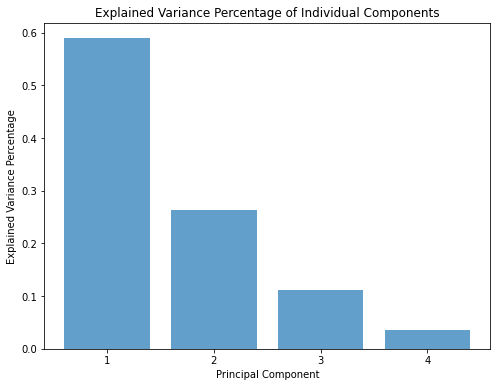

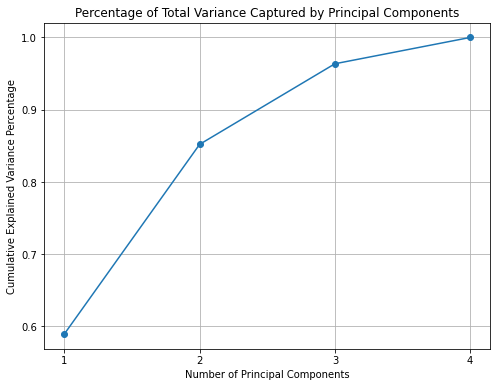

Number of components that explain 0.85 of the variance in the dataset: 2


In [505]:
# Decide the number of components for PCA based on :
# https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d
# Method 3 

# Set the number of components for PCA
n_components = 4
threshold = 0.85
X_pca, pca = perform_pca(X_standardized, n_components)
# Calculate the number of components that explain 85% of the variance
number_of_calculated_components = calculate_number_of_components(pca, threshold)




In [506]:


def determine_thresholds(pca_df: pd.DataFrame) -> np.array:
    """
    Divide the range of attribute values into N intervals of equal size, Equal-width intervals.
    :params:
    pca_df(pandas.DataFrame): dataframe with the distance from the origin
    :return:
    thresholds(np.array): numpy array with the thresholds
    """
    num_grades = 5
    min_distance = pca_df['distance_from_origin'].min()
    max_distance = pca_df['distance_from_origin'].max()
    thresholds = np.linspace(min_distance, max_distance, num_grades + 1)[1:-1]
    return thresholds

def assign_grade(distance:float, thresholds:np.array)->str:
    """
    Assign grades based on distance from the origin
    :params:
    distance(float): distance from the origin
    thresholds(np.array): numpy array with the thresholds
    :return:
    grade(str): grade assigned to the distance
    """
    for i, threshold in enumerate(thresholds):
        if distance <= threshold:
            return f'{i + 1}'
    return f'{len(thresholds) + 1}'

In [507]:


# Number of components that explain (threshold = 0.85) of the variance
n_components = number_of_calculated_components
X_pca, pca = perform_pca(X_standardized, n_components)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(X_pca, index=X.index, columns=[f"PCA_{i+1}" for i in range(n_components)])

# Calculate the Euclidean distance from the origin (0, 0)
pca_df['distance_from_origin'] = np.sqrt(pca_df['PCA_1']**2 + pca_df['PCA_2']**2)
thresholds = determine_thresholds(pca_df)

# Apply the grading function to each row
pca_df['grade'] = pca_df['distance_from_origin'].apply(assign_grade, thresholds=thresholds)

df_with_grades = averaged_df.merge(pca_df["grade"], left_index=True, right_index=True)
print(df_with_grades)
# Save the PCA grades to a CSV file
df_with_grades.to_csv(f"pca_grades_{n_components}_components.csv")



    NUM_CHILDREN  SALARY_PER_MONTH      CAR_VALUE  Years_of_education grade
ID                                                                         
1              4           4343.00   23232.000000           10.000000     1
2              3           6464.00   35353.000000           14.272727     1
3              2           7657.00   53234.000000           15.000000     1
4              4          36456.00    4654.000000           18.000000     2
5              5           4564.00   75458.166667           14.272727     1
6              2           5355.00   53453.000000           16.000000     1
7              1          10943.00    7576.000000           13.000000     1
8              3           9000.00    3353.000000           12.000000     1
9              5           5454.00   64757.000000            9.000000     2
10             6          15389.25  543523.000000            5.000000     5
11             2           6456.00   46456.000000           18.000000     1
12          